In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('MBB.csv')
#df1=df.reset_index()['Price']
df=df.reset_index()['Price']
df

0       11783.9
1       12267.4
2       12267.4
3       12307.6
4       12448.7
         ...   
1237    18850.0
1238    18800.0
1239    18450.0
1240    18600.0
1241    18650.0
Name: Price, Length: 1242, dtype: float64

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 15s 610ms/step - loss: 0.0104 - val_loss: 0.1410
Epoch 2/100
9/9 [==============================] - 3s 315ms/step - loss: 0.0025 - val_loss: 0.2605
Epoch 3/100
9/9 [==============================] - 3s 312ms/step - loss: 0.0017 - val_loss: 0.1628
Epoch 4/100
9/9 [==============================] - 3s 317ms/step - loss: 0.0014 - val_loss: 0.1879
Epoch 5/100
9/9 [==============================] - 3s 315ms/step - loss: 0.0012 - val_loss: 0.0992
Epoch 6/100
9/9 [==============================] - 3s 309ms/step - loss: 9.9126e-04 - val_loss: 0.0718
Epoch 7/100
9/9 [==============================] - 3s 317ms/step - loss: 7.7976e-04 - val_loss: 0.0161
Epoch 8/100
9/9 [==============================] - 3s 318ms/step - loss: 6.7525e-04 - val_loss: 0.0051
Epoch 9/100
9/9 [==============================] - 3s 324ms/step - loss: 6.0768e-04 - val_loss: 0.0046
Epoch 10/100
9/9 [==============================] - 3s 316ms/step - loss: 5.5890e-04 - val_l

9/9 [==============================] - 3s 285ms/step - loss: 1.7519e-04 - val_loss: 0.0121
Epoch 81/100
9/9 [==============================] - 3s 290ms/step - loss: 1.7754e-04 - val_loss: 0.0170
Epoch 82/100
9/9 [==============================] - 3s 287ms/step - loss: 1.6895e-04 - val_loss: 0.0185
Epoch 83/100
9/9 [==============================] - 3s 287ms/step - loss: 1.7551e-04 - val_loss: 0.0158
Epoch 84/100
9/9 [==============================] - 3s 293ms/step - loss: 1.7164e-04 - val_loss: 0.0085
Epoch 85/100
9/9 [==============================] - 3s 289ms/step - loss: 1.8850e-04 - val_loss: 0.0170
Epoch 86/100
9/9 [==============================] - 3s 292ms/step - loss: 1.7231e-04 - val_loss: 0.0188
Epoch 87/100
9/9 [==============================] - 3s 294ms/step - loss: 1.6397e-04 - val_loss: 0.0237
Epoch 88/100
9/9 [==============================] - 3s 293ms/step - loss: 1.6453e-04 - val_loss: 0.0349
Epoch 89/100
9/9 [==============================] - 3s 289ms/step - loss: 1.8

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

5/5 [==============================] - 0s 57ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [12]:
train_size1 = int(0.5 * len(df))
test_size1 = int(0.3 * len(df))

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1)

In [13]:
# 12. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val1)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test1)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_val1 - y_pred_val) / y_val1)) * 100
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val1))
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 2844.12527041558
Testing RMSE: 7206.966732320855
Validation MAPE: 11.05152050602968
Testing MAPE: 31.526752280159236
Validation MAE: 2218.3564498810274
Testing MAE: 5664.577981369406


In [14]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=188
i=0
while(i<30):

    if(len(temp_input)>150):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.72234985 0.74176728 0.73788566 0.73594252 0.74060233 0.74526214
 0.74992195 0.76623129 0.76390138 0.75458176 0.76623129 0.7708911
 0.76390138 0.76623129 0.73594252 0.7266229  0.72196308 0.71730327
 0.71497337 0.70798365 0.69633413 0.68002479 0.64274631 0.65905564
 0.65206593 0.65439583 0.64274631 0.60080801 0.60546782 0.5938183
 0.58682858 0.5961482  0.53557066 0.54023047 0.55886972 0.5076118
 0.45402398 0.46800341 0.41208568 0.4633436  0.47499313 0.49363237
 0.47965294 0.48198284 0.47965294 0.4633436  0.41441559 0.39111654
 0.42839502 0.42839502 0.47965294 0.48664265 0.48897256 0.50295199
 0.49829218 0.48664265 0.49829218 0.45402398 0.46567351 0.45402398
 0.40043616 0.40975578 0.3724773  0.32354928 0.36781748 0.39577635
 0.39577635 0.39577635 0.40043616 0.39577635 0.39577635 0.4190754
 0.46567351 0.46567351 0.47499313 0.49363237 0.54023047 0.5495501
 0.48897256 0.47033332 0.5076118  0.51227161 0.48897256 0.50295199
 0.50994171 0.54722019 0.54023047 0.51926133 0.48431275

4 day output [[0.62336767]]
5 day input [0.74526214 0.74992195 0.76623129 0.76390138 0.75458176 0.76623129
 0.7708911  0.76390138 0.76623129 0.73594252 0.7266229  0.72196308
 0.71730327 0.71497337 0.70798365 0.69633413 0.68002479 0.64274631
 0.65905564 0.65206593 0.65439583 0.64274631 0.60080801 0.60546782
 0.5938183  0.58682858 0.5961482  0.53557066 0.54023047 0.55886972
 0.5076118  0.45402398 0.46800341 0.41208568 0.4633436  0.47499313
 0.49363237 0.47965294 0.48198284 0.47965294 0.4633436  0.41441559
 0.39111654 0.42839502 0.42839502 0.47965294 0.48664265 0.48897256
 0.50295199 0.49829218 0.48664265 0.49829218 0.45402398 0.46567351
 0.45402398 0.40043616 0.40975578 0.3724773  0.32354928 0.36781748
 0.39577635 0.39577635 0.39577635 0.40043616 0.39577635 0.39577635
 0.4190754  0.46567351 0.46567351 0.47499313 0.49363237 0.54023047
 0.5495501  0.48897256 0.47033332 0.5076118  0.51227161 0.48897256
 0.50295199 0.50994171 0.54722019 0.54023047 0.51926133 0.48431275
 0.48897256 0.50295199

8 day output [[0.73828804]]
9 day input [0.75458176 0.76623129 0.7708911  0.76390138 0.76623129 0.73594252
 0.7266229  0.72196308 0.71730327 0.71497337 0.70798365 0.69633413
 0.68002479 0.64274631 0.65905564 0.65206593 0.65439583 0.64274631
 0.60080801 0.60546782 0.5938183  0.58682858 0.5961482  0.53557066
 0.54023047 0.55886972 0.5076118  0.45402398 0.46800341 0.41208568
 0.4633436  0.47499313 0.49363237 0.47965294 0.48198284 0.47965294
 0.4633436  0.41441559 0.39111654 0.42839502 0.42839502 0.47965294
 0.48664265 0.48897256 0.50295199 0.49829218 0.48664265 0.49829218
 0.45402398 0.46567351 0.45402398 0.40043616 0.40975578 0.3724773
 0.32354928 0.36781748 0.39577635 0.39577635 0.39577635 0.40043616
 0.39577635 0.39577635 0.4190754  0.46567351 0.46567351 0.47499313
 0.49363237 0.54023047 0.5495501  0.48897256 0.47033332 0.5076118
 0.51227161 0.48897256 0.50295199 0.50994171 0.54722019 0.54023047
 0.51926133 0.48431275 0.48897256 0.50295199 0.49130246 0.44703426
 0.46800341 0.47732303 0

12 day output [[0.92189693]]
13 day input [0.76623129 0.73594252 0.7266229  0.72196308 0.71730327 0.71497337
 0.70798365 0.69633413 0.68002479 0.64274631 0.65905564 0.65206593
 0.65439583 0.64274631 0.60080801 0.60546782 0.5938183  0.58682858
 0.5961482  0.53557066 0.54023047 0.55886972 0.5076118  0.45402398
 0.46800341 0.41208568 0.4633436  0.47499313 0.49363237 0.47965294
 0.48198284 0.47965294 0.4633436  0.41441559 0.39111654 0.42839502
 0.42839502 0.47965294 0.48664265 0.48897256 0.50295199 0.49829218
 0.48664265 0.49829218 0.45402398 0.46567351 0.45402398 0.40043616
 0.40975578 0.3724773  0.32354928 0.36781748 0.39577635 0.39577635
 0.39577635 0.40043616 0.39577635 0.39577635 0.4190754  0.46567351
 0.46567351 0.47499313 0.49363237 0.54023047 0.5495501  0.48897256
 0.47033332 0.5076118  0.51227161 0.48897256 0.50295199 0.50994171
 0.54722019 0.54023047 0.51926133 0.48431275 0.48897256 0.50295199
 0.49130246 0.44703426 0.46800341 0.47732303 0.47499313 0.4610137
 0.50295199 0.5006220

16 day output [[1.1979371]]
17 day input [0.71730327 0.71497337 0.70798365 0.69633413 0.68002479 0.64274631
 0.65905564 0.65206593 0.65439583 0.64274631 0.60080801 0.60546782
 0.5938183  0.58682858 0.5961482  0.53557066 0.54023047 0.55886972
 0.5076118  0.45402398 0.46800341 0.41208568 0.4633436  0.47499313
 0.49363237 0.47965294 0.48198284 0.47965294 0.4633436  0.41441559
 0.39111654 0.42839502 0.42839502 0.47965294 0.48664265 0.48897256
 0.50295199 0.49829218 0.48664265 0.49829218 0.45402398 0.46567351
 0.45402398 0.40043616 0.40975578 0.3724773  0.32354928 0.36781748
 0.39577635 0.39577635 0.39577635 0.40043616 0.39577635 0.39577635
 0.4190754  0.46567351 0.46567351 0.47499313 0.49363237 0.54023047
 0.5495501  0.48897256 0.47033332 0.5076118  0.51227161 0.48897256
 0.50295199 0.50994171 0.54722019 0.54023047 0.51926133 0.48431275
 0.48897256 0.50295199 0.49130246 0.44703426 0.46800341 0.47732303
 0.47499313 0.4610137  0.50295199 0.50062208 0.51227161 0.51460152
 0.51460152 0.5122716

20 day output [[1.5699692]]
21 day input [0.68002479 0.64274631 0.65905564 0.65206593 0.65439583 0.64274631
 0.60080801 0.60546782 0.5938183  0.58682858 0.5961482  0.53557066
 0.54023047 0.55886972 0.5076118  0.45402398 0.46800341 0.41208568
 0.4633436  0.47499313 0.49363237 0.47965294 0.48198284 0.47965294
 0.4633436  0.41441559 0.39111654 0.42839502 0.42839502 0.47965294
 0.48664265 0.48897256 0.50295199 0.49829218 0.48664265 0.49829218
 0.45402398 0.46567351 0.45402398 0.40043616 0.40975578 0.3724773
 0.32354928 0.36781748 0.39577635 0.39577635 0.39577635 0.40043616
 0.39577635 0.39577635 0.4190754  0.46567351 0.46567351 0.47499313
 0.49363237 0.54023047 0.5495501  0.48897256 0.47033332 0.5076118
 0.51227161 0.48897256 0.50295199 0.50994171 0.54722019 0.54023047
 0.51926133 0.48431275 0.48897256 0.50295199 0.49130246 0.44703426
 0.46800341 0.47732303 0.47499313 0.4610137  0.50295199 0.50062208
 0.51227161 0.51460152 0.51460152 0.51227161 0.51460152 0.51460152
 0.51460152 0.52625104 

24 day output [[2.0121841]]
25 day input [0.65439583 0.64274631 0.60080801 0.60546782 0.5938183  0.58682858
 0.5961482  0.53557066 0.54023047 0.55886972 0.5076118  0.45402398
 0.46800341 0.41208568 0.4633436  0.47499313 0.49363237 0.47965294
 0.48198284 0.47965294 0.4633436  0.41441559 0.39111654 0.42839502
 0.42839502 0.47965294 0.48664265 0.48897256 0.50295199 0.49829218
 0.48664265 0.49829218 0.45402398 0.46567351 0.45402398 0.40043616
 0.40975578 0.3724773  0.32354928 0.36781748 0.39577635 0.39577635
 0.39577635 0.40043616 0.39577635 0.39577635 0.4190754  0.46567351
 0.46567351 0.47499313 0.49363237 0.54023047 0.5495501  0.48897256
 0.47033332 0.5076118  0.51227161 0.48897256 0.50295199 0.50994171
 0.54722019 0.54023047 0.51926133 0.48431275 0.48897256 0.50295199
 0.49130246 0.44703426 0.46800341 0.47732303 0.47499313 0.4610137
 0.50295199 0.50062208 0.51227161 0.51460152 0.51460152 0.51227161
 0.51460152 0.51460152 0.51460152 0.52625104 0.56818934 0.57517905
 0.57750896 0.58216877

28 day output [[2.454776]]
29 day input [0.5938183  0.58682858 0.5961482  0.53557066 0.54023047 0.55886972
 0.5076118  0.45402398 0.46800341 0.41208568 0.4633436  0.47499313
 0.49363237 0.47965294 0.48198284 0.47965294 0.4633436  0.41441559
 0.39111654 0.42839502 0.42839502 0.47965294 0.48664265 0.48897256
 0.50295199 0.49829218 0.48664265 0.49829218 0.45402398 0.46567351
 0.45402398 0.40043616 0.40975578 0.3724773  0.32354928 0.36781748
 0.39577635 0.39577635 0.39577635 0.40043616 0.39577635 0.39577635
 0.4190754  0.46567351 0.46567351 0.47499313 0.49363237 0.54023047
 0.5495501  0.48897256 0.47033332 0.5076118  0.51227161 0.48897256
 0.50295199 0.50994171 0.54722019 0.54023047 0.51926133 0.48431275
 0.48897256 0.50295199 0.49130246 0.44703426 0.46800341 0.47732303
 0.47499313 0.4610137  0.50295199 0.50062208 0.51227161 0.51460152
 0.51460152 0.51227161 0.51460152 0.51460152 0.51460152 0.52625104
 0.56818934 0.57517905 0.57750896 0.58216877 0.56119962 0.57517905
 0.54489028 0.54722019

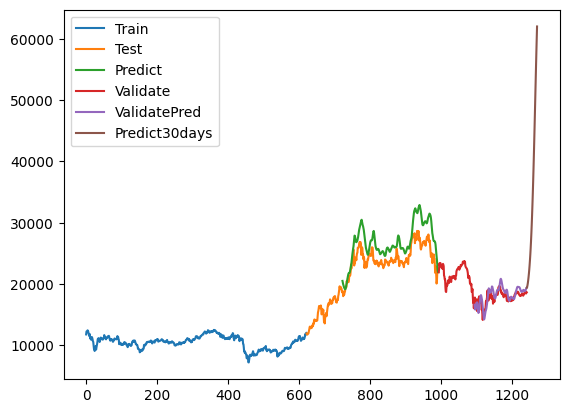

In [15]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()